# Trabajo Práctico Final

En este trabajo, abordaran el desarrollo de un sistema de recomendacion para un conjunto de datos de anime.
El objetivo es crear un sistema que genere recomendaciones personalizadas para todos los usuarios, incluyendo aquellos que no tienen ning´un historial de visualizaci´on en el conjunto de entrenamiento.
La consigna para este proyecto es la siguiente:
1. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba, utilizando una proporcion adecuada.
2. Desarrollar un sistema de recomendacion capaz de generar 20 recomendaciones por usuario.
3. Las recomendaciones deben estar en terminos de ”anime id” (identificador del anime) y deben ser para aquellos que el usuario a´un no haya visto segun los datos del conjunto de entrenamiento.
4. Evaluar el sistema de recomendacion utilizando la metrica MAP.
Para generar las recomendaciones, se dispone de calificaciones explicitas del 1 al 10 para los animes. Estas calificaciones pueden ser utilizadas como base para la generacion de las recomendaciones. Ademas, se recomienda tener en cuenta la disponibilidad de los animes para filtrar las recomendaciones, evitando aquellos que no estaran disponibles en el conjunto de prueba.

# Contenido de los datasets

## animelist.csv
Tiene la lista de todos los animes registrados por el usuario con la puntuación respectiva, estado de visualización y número de episodios vistos. Este conjunto de datos contiene 109 millones de filas, 17.562 animes diferentes y 325.772 usuarios diferentes. El archivo tiene las siguientes columnas:

- `user_id`: ID de usuario no identificable generado aleatoriamente.
- `anime_id`: MyAnimeList ID del anime. (por ejemplo, 1).
- `puntuación`: puntuación entre 1 a 10 otorgada por el usuario. 0 si el usuario no asignó una puntuación. (por ejemplo, 10)
- `watch_status`: ID del estado de este anime en la lista de anime de este usuario. (por ejemplo, 2)
- `episodios_vistos`: número de episodios vistos por el usuario. (por ejemplo, 24)

## watching_status.csv
Describa todos los estados posibles de la columna: "watching_status" en animelist.csv.

## rating_complete.csv
Es un subconjunto de animelist.csv. Este conjunto de datos solo considera los animes que el usuario ha visto por completo (`watching_status==2`) y le ha otorgado una puntuación (`score!=0`). Este conjunto de datos contiene 57 millones de calificaciones aplicadas a 16.872 animes por 310.059 usuarios. Este archivo tiene las siguientes columnas:

- `user_id`: ID de usuario no identificable generado aleatoriamente.
- `anime_id`: MyAnimeList ID del anime que este usuario ha calificado.
- `rating`: calificación que le ha asignado este usuario.

## anime.csv
Contiene información general de cada anime (17.562 animes diferentes) como género, estadísticas, estudio, etc. Este archivo tiene las siguientes columnas:

- `MAL_ID`: MyAnimeList ID del anime. (por ejemplo, 1)
- `Nombre`: nombre completo del anime. (por ejemplo, Cowboy Bebop)
- `Puntuación`: puntuación media del anime proporcionada por todos los usuarios en la base de datos MyAnimeList. (por ejemplo, 8,78)
- `Géneros`: lista de géneros separados por comas para este anime. (p. ej., acción, aventuras, comedia, drama, ciencia ficción, espacio)
- `Nombre en inglés`: nombre completo en inglés del anime. (por ejemplo, Cowboy Bebop)
- `Nombre japonés`: nombre completo en japonés del anime. (por ejemplo, カウボーイビバップ)
- `Tipo`: TV, película, OVA, etc. (por ejemplo, TV)
- `Episodios`: número de capítulos. (por ejemplo, 26)
- `Emitido`: fecha de emisión. (p. ej., 3 de abril de 1998 al 24 de abril de 1999)
- `Estrenada`: estreno de temporada. (por ejemplo, primavera de 1998)
- `Productores`: lista de productores separados por comas (por ejemplo, Bandai Visual)
- `Licenciantes`: lista de licenciantes separados por comas (por ejemplo, Funimation, Bandai Entertainment)
- `Estudios`: lista de estudios separados por comas (por ejemplo, Sunrise)
- `Fuente`: Manga, novela ligera, libro, etc. (p. ej., original)
- `Duración`: duración del anime por episodio (ej. 24 min. por ep.)
- `Clasificación`: tasa de edad (por ejemplo, R - 17+ (violencia y malas palabras))
- `Clasificado`: posición basada en la puntuación. (por ejemplo, 28)
- `Popularidad`: posición basada en la cantidad de usuarios que han agregado el anime a su lista. (por ejemplo, 39)
- `Miembros`: número de miembros de la comunidad que están en el "grupo" de este anime. (por ejemplo, 1251960)
- `Favoritos`: número de usuarios que tienen el anime como “favoritos”. (por ejemplo, 61.971)
- `Viendo`: número de usuarios que están viendo el anime. (por ejemplo, 105808)
- `Completado`: número de usuarios que han completado el anime. (por ejemplo, 718161)
- `En Espera`: número de usuarios que tienen el anime en Espera. (por ejemplo, 71513)
- `Caído`: número de usuarios que han abandonado el anime. (por ejemplo, 26678)
- `Plan to Watch`: número de usuarios que planean ver el anime. (por ejemplo, 329800)
- `Puntuación-10`: número de usuarios que obtuvieron una puntuación de 10 (p. ej., 229170)
- `Puntuación-9`: número de usuarios que obtuvieron una puntuación de 9 (p. ej., 182126)
- `Puntuación-8`: número de usuarios que obtuvieron una puntuación de 8 (p. ej., 131625)
- `Puntuación-7`: número de usuarios que obtuvieron una puntuación de 7 (p. ej., 62330)
- `Puntuación-6`: número de usuarios que obtuvieron una puntuación de 6 (p. ej., 20688)
- `Puntuación-5`: número de usuarios que obtuvieron una puntuación de 5 (por ejemplo, 8904)
- `Puntuación-4`: número de usuarios que obtuvieron una puntuación de 4 (por ejemplo, 3184)
- `Puntuación-3`: número de usuarios que obtuvieron una puntuación de 3 (p. ej., 1357)
- `Puntuación-2`: número de usuarios que obtuvieron una puntuación de 2 (p. ej., 741)
- `Puntuación-1`: número de usuarios que obtuvieron una puntuación de 1 (p. ej., 1580)


# Se presenta un resumen del flujo de trabajo seguido en el presente proyecto:

1. **Preparación de Datos:**
   - Se inicia importando las bibliotecas necesarias y cargando un conjunto de datos que contiene calificaciones de usuarios para diferentes animes. Cada fila en el conjunto de datos representa una calificación otorgada por un usuario a un anime específico.  
   
2. **Filtrado y Mezclado de Datos:**
   - Se agrega una nueva columna al conjunto de datos para indicar cuántos animes ha visto cada usuario. Luego, se ordenan los datos en función de esta información, asegurándose de que los usuarios que han visto más animes aparezcan primero. Posteriormente, se seleccionan las primeras 300,000 filas y se mezclan aleatoriamente para obtener una muestra representativa del conjunto de datos original.  

3. **Configuración del Modelo:**
   - Se utiliza la biblioteca Surprise para configurar el conjunto de datos en un formato adecuado para el algoritmo de filtrado colaborativo basado en usuarios, específicamente el algoritmo KNN (Vecinos más Cercanos). Este conjunto de datos se divide en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.  

4. **Entrenamiento del Modelo:**
   - El modelo KNN se entrena utilizando el conjunto de entrenamiento. Este modelo utiliza la similitud coseno entre usuarios para encontrar patrones de comportamiento similares. También se ajusta un parámetro de contracción (shrinkage) para mejorar la precisión del modelo.  

5. **Generación de Recomendaciones:**
   - Se generan recomendaciones para cada usuario utilizando el modelo entrenado. Estas recomendaciones se basan en la similitud de gustos entre usuarios. El código filtra las recomendaciones para excluir los animes que el usuario ya ha visto, proporcionando así sugerencias de animes que aún no han sido explorados por el usuario.  

6. **Evaluación del Modelo:**
   - La métrica Mean Average Precision (MAP) se utiliza para evaluar la calidad de las recomendaciones. MAP mide cuán precisas son las recomendaciones en comparación con las preferencias reales de los usuarios. Un MAP más alto indica un rendimiento superior del sistema de recomendación.  
 
7. **Presentación de Resultados:**
   - El valor calculado de Mean Average Precision se imprime como resultado final. Este valor proporciona una medida cuantitativa del rendimiento del sistema de recomendación. Un MAP cercano a 1 indica que las recomendaciones son altamente precisas y relevantes para los usuarios.

In [27]:
# !pip install scikit-surprise

In [28]:
# conda install -c conda-forge scikit-surprise

In [1]:
# importación de librerías
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura del conjunto de datos de calificaciones de animes desde un archivo CSV
rating_df = pd.read_csv(r"D:\Exe\OneDrive - alumnos.frm.utn.edu.ar\Cursos\Data Science\TP4\Dataset\rating_complete.csv")
rating_df

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [31]:
rating_df.user_id.nunique()

310059

In [32]:
rating_df.anime_id.nunique()

16872

In [33]:
rating_df.rating.max()

10

In [34]:
rating_df.rating.min()

1

In [3]:
# Creación de una columna que indica la cantidad de animes vistos por cada usuario y ordenar el DataFrame por esta columna

rating_df['animes_vistos_por_usuario'] = rating_df.groupby('user_id')['anime_id'].transform('count')
rating_df = rating_df.sort_values(by='animes_vistos_por_usuario', ascending=False)
rating_df

,user_id,anime_id,rating,animes_vistos_por_usuario
30753355,189037,36197,7,15455
30751104,189037,2790,7,15455
30751111,189037,8415,7,15455
30751110,189037,35581,6,15455
30751109,189037,34165,7,15455
...,...,...,...,...
15558433,95465,28977,10,1
15578493,95571,10711,7,1
15580231,95586,31815,10,1
15582280,95603,245,10,1


In [4]:
# Selección de las primeras 300.000 filas del DataFrame y mezclado aleatorio de las filas
df_reducido = rating_df.head(300000)
df_reducido = df_reducido.sample(frac=1, random_state=42)
df = df_reducido.copy()
df

,user_id,anime_id,rating,animes_vistos_por_usuario
30749440,189037,21955,7,15455
46265935,283786,27509,7,12778
50942861,312302,668,7,8006
42630098,261827,9880,7,4655
13884293,85106,36390,1,6464
...,...,...,...,...
53562033,328195,14189,9,7779
31704145,194781,41468,5,5023
49020272,300428,650,6,7503
31049076,190748,6980,7,7032


In [37]:
# Información acerca del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 30749440 to 53559865
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   user_id                    300000 non-null  int64
 1   anime_id                   300000 non-null  int64
 2   rating                     300000 non-null  int64
 3   animes_vistos_por_usuario  300000 non-null  int64
dtypes: int64(4)
memory usage: 11.4 MB


In [38]:
# Verificación de nulos
df.isna().sum()

user_id                      0
anime_id                     0
rating                       0
animes_vistos_por_usuario    0
dtype: int64

In [39]:
df.user_id.nunique()

43

In [40]:
df.anime_id.nunique()

16785

# Análisis exploratorio de datos

In [44]:
base_de_datos = pd.read_csv(r"D:\Exe\OneDrive - alumnos.frm.utn.edu.ar\Cursos\Data Science\TP4\Entrega\base_de_datos.csv")
base_de_datos.head()

,anime_id,name,genres,type,episodes,sypnopsis
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"other day, another bounty—such is the life of ..."
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,52,It is the dark century and the people are suff...


In [45]:
base_de_datos = base_de_datos.drop(["genres", "type", "episodes", "sypnopsis"], axis=1)
base_de_datos

,anime_id,name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu
16210,48483,Mieruko-chan
16211,48488,Higurashi no Naku Koro ni Sotsu
16212,48491,Yama no Susume: Next Summit


In [46]:
df_eda = pd.merge(df, base_de_datos, on="anime_id")
df_eda

,user_id,anime_id,rating,animes_vistos_por_usuario,name
0,189037,21955,7,15455,Sore Ike! Anpanman: Kokin-chan to Namida no Ch...
1,107014,21955,5,4769,Sore Ike! Anpanman: Kokin-chan to Namida no Ch...
2,276953,21955,4,7277,Sore Ike! Anpanman: Kokin-chan to Namida no Ch...
3,312302,21955,7,8006,Sore Ike! Anpanman: Kokin-chan to Namida no Ch...
4,336459,21955,1,8567,Sore Ike! Anpanman: Kokin-chan to Namida no Ch...
...,...,...,...,...,...
282175,189037,39505,7,15455,Doubutsu Mura no World Cup: Yoiko no Koutsuu A...
282176,189037,42460,7,15455,Xing You Ji: Fengbao Famila 2
282177,162615,30975,10,14864,Nanoha
282178,85106,43598,1,6464,Ookina Furudokei


In [47]:
# TOP_20 animes más vistos
# Agrupa por 'name' y cuenta la cantidad de veces que cada anime fue visto
anime_counts = df_eda.groupby('name').size().reset_index(name='view_count')

# Obtén los 20 animes más vistos
top_animes = anime_counts.nlargest(20, 'view_count')

In [48]:
top_animes = df_eda['name'].value_counts().nlargest(20)

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


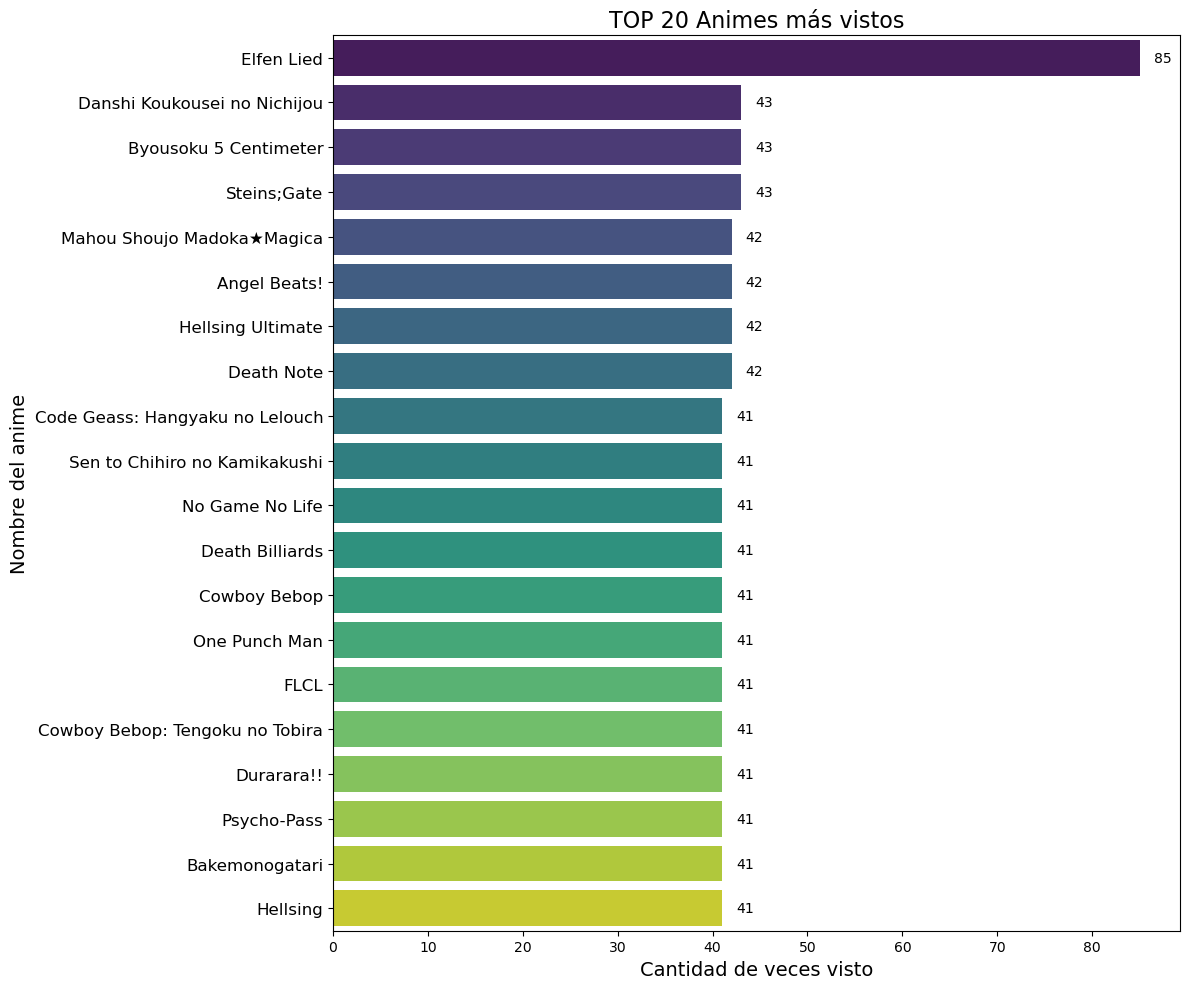

In [50]:
# Crea un gráfico de barras horizontales con etiquetas de conteo
plt.figure(figsize=(12, 10))  # Ajusta el tamaño del gráfico
ax = sns.barplot(x=top_animes.values, y=top_animes.index, palette='viridis')
plt.xlabel('Cantidad de veces visto', fontsize=14)
plt.ylabel('Nombre del anime', fontsize=14)
plt.title('TOP 20 Animes más vistos', fontsize=16)

# Ajusta el tamaño de la fuente para las etiquetas
ax.tick_params(axis='y', labelsize=12)

# Agrega etiquetas con el conteo al lado derecho de cada barra
for p, count in zip(ax.patches, top_animes):
    ax.annotate(count, (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points', fontsize=10)

plt.tight_layout()  # Ajusta automáticamente la disposición para evitar superposiciones
plt.show()

In [52]:
# Obtén los 20 usuarios que más animés vieron
top_20_users = df_eda['user_id'].value_counts().nlargest(20).index
# Filtra el DataFrame original para incluir solo los 20 usuarios más activos
top_20_users_df = df_eda[df_eda['user_id'].isin(top_20_users)]

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


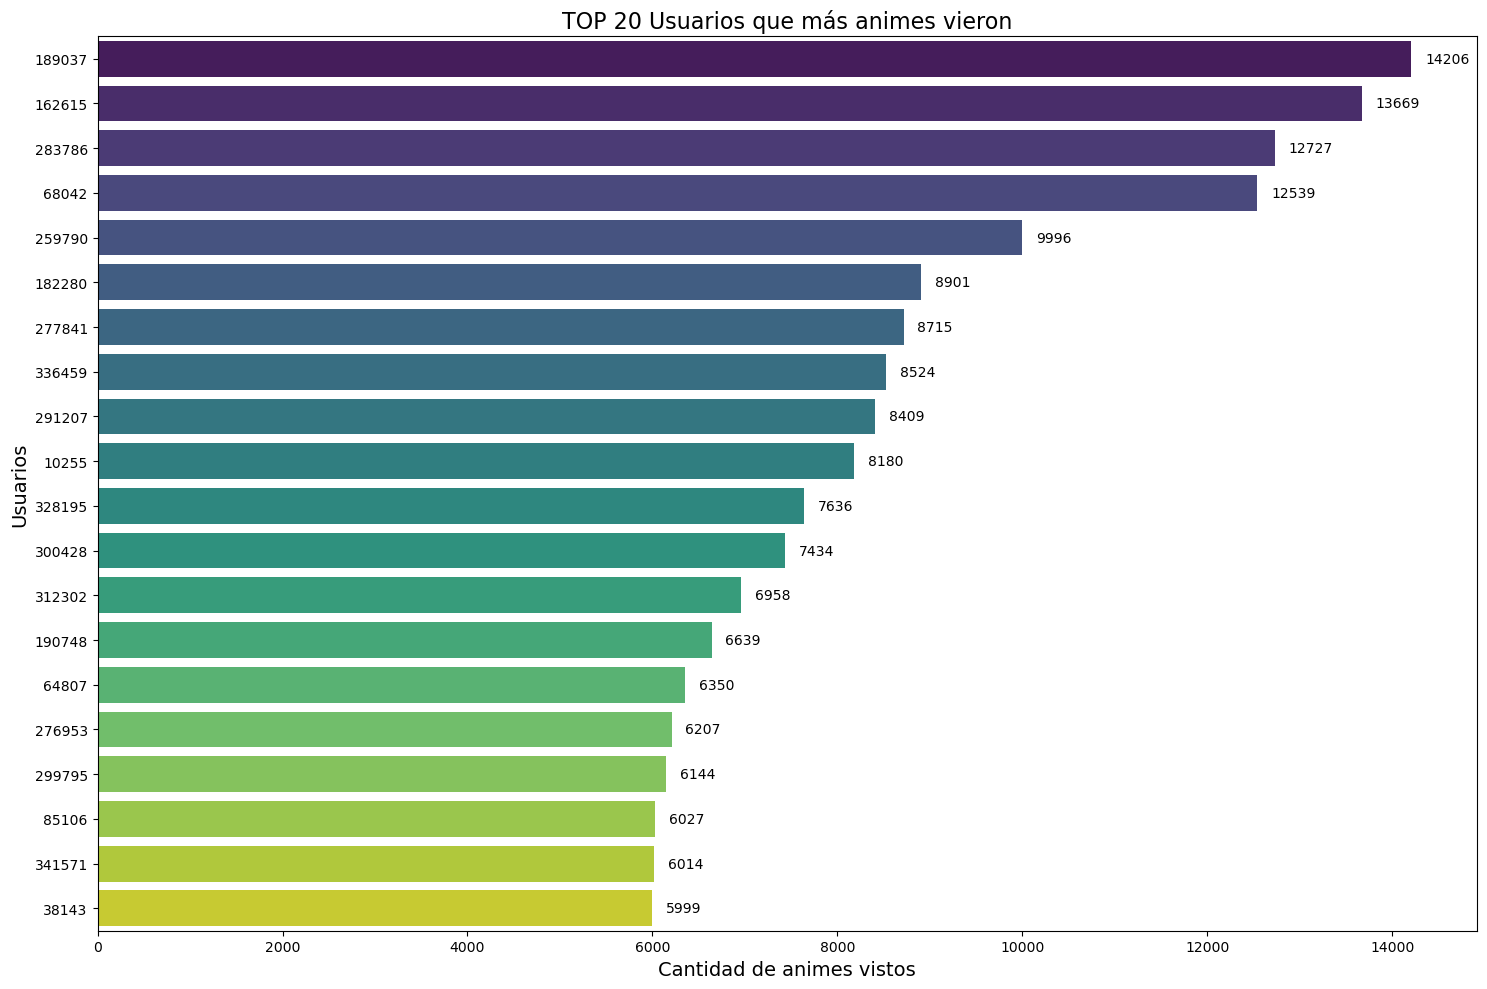

In [54]:
# Crea un gráfico de barras horizontales con etiquetas de conteo
plt.figure(figsize=(15, 10))
ax = sns.countplot(y='user_id', data=top_20_users_df, order=top_20_users, palette='viridis')
plt.xlabel("Cantidad de animes vistos", fontsize=14)
plt.ylabel("Usuarios", fontsize=14)
plt.title("TOP 20 Usuarios que más animes vieron", fontsize=16)

# Agrega etiquetas con el conteo en cada barra
for p, count, user_id in zip(ax.patches, top_20_users_df['user_id'].value_counts(), top_20_users_df['user_id'].value_counts().index):
    ax.annotate(count, (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

# Sistema de recomendación

In [5]:
# Configuración del lector y carga de datos en el formato necesario para Surprise
reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(df[['user_id', 'anime_id', 'rating']], reader)

Este bloque de código se encarga de preparar los datos para su uso en el sistema de recomendación utilizando la biblioteca Surprise

1. **`Reader(rating_scale=(1,10))`:**  
   - Se instancia un objeto `Reader` que proporciona una interfaz para leer los datos del conjunto de datos. En este caso, se especifica que la escala de calificación está entre 1 y 10, lo que significa que las calificaciones de los animes se encuentran en ese rango.  

2. **`Dataset.load_from_df(df[['user_id', 'anime_id', 'rating']], reader)`:**
   - Se utiliza el objeto `Reader` previamente creado para cargar el conjunto de datos desde un DataFrame de pandas (`df`). El DataFrame debe contener columnas denominadas 'user_id', 'anime_id' y 'rating', que representan el identificador del usuario, el identificador del anime y la calificación otorgada por el usuario al anime, respectivamente.
   - Se crea un objeto `Dataset` a partir de estos datos utilizando el método `load_from_df`.

In [6]:
# División del conjunto de datos en conjuntos de entrenamiento y prueba
train, test = train_test_split(data, random_state=42, test_size=0.2)

In [17]:
train

In [23]:
# Extraer información del trainset
ratings_data = [(train.to_raw_uid(uid), train.to_raw_iid(iid), r) for (uid, iid, r) in train.all_ratings()]

# Crear un DataFrame
train_df = pd.DataFrame(ratings_data, columns=['user_id', 'anime_id', 'rating'])

In [24]:
train_df

,user_id,anime_id,rating
0,323567,40686,4.0
1,323567,2475,3.0
2,323567,5272,5.0
3,323567,10743,6.0
4,323567,5680,8.0
...,...,...,...
239995,316154,29093,6.0
239996,316154,5762,7.0
239997,316154,29661,6.0
239998,316154,413,1.0


In [25]:
train_df.user_id.nunique()

43

In [26]:
train_df.anime_id.nunique()

16752

In [13]:
# Conversión de test a dataframe para poder acceder al contenido visto por cada usuario
test_df = pd.DataFrame(test, columns=['user_id', 'anime_id', 'rating'])
test_df

,user_id,anime_id,rating
0,299795,39331,4.0
1,299795,39707,2.0
2,189037,34410,7.0
3,259790,30014,4.0
4,328195,24655,7.0
...,...,...,...
59995,291207,29837,2.0
59996,283786,22231,6.0
59997,107014,31486,5.0
59998,10255,9976,4.0


In [7]:
# Configuración de opciones para el algoritmo KNN
sim_options = {'name' : 'cosine', 'user_based' : True}

# Inicialización del modelo KNN con las opciones especificadas
model = KNNBasic(sim_options=sim_options)
model.sim_options['shrinkage'] = 10  # Ajustar el parámetro de contracción (shrinkage)

Este bloque de código se encarga de configurar e inicializar el modelo de filtrado colaborativo basado en vecinos más cercanos (KNN) utilizando la biblioteca Surprise.

1. **`sim_options = {'name' : 'cosine', 'user_based' : True}`:**
   - Se crea un diccionario llamado `sim_options` que especifica las opciones de similitud para el algoritmo KNN.
   - `'name' : 'cosine'` indica que la similitud entre usuarios (o ítems, dependiendo de la opción) se calculará utilizando la métrica de similitud coseno. Esta métrica mide la similitud direccional entre vectores, en este caso, vectores que representan a los usuarios en un espacio de características.
   - `'user_based' : True` indica que se está utilizando un enfoque basado en usuarios para calcular la similitud. Esto significa que las recomendaciones se harán en función de la similitud de gustos entre usuarios similares.

2. **`model = KNNBasic(sim_options=sim_options)`:**
   - Se inicializa un objeto de modelo KNNBasic utilizando las opciones de similitud especificadas en el diccionario `sim_options`. El modelo KNNBasic implementa el algoritmo de vecinos más cercanos para filtrado colaborativo.

3. **`model.sim_options['shrinkage'] = 10` :**
   - Se ajusta el parámetro de contracción (`shrinkage`) del modelo. El parámetro de contracción es un componente importante para regularizar el modelo y evitar sobreajuste. En este caso, se establece el valor de contracción en 10.

In [8]:
# Entrenamiento del modelo
model.fit(train)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [9]:
with open("model_knn.pickle", "wb") as file:
    pickle.dump(model, file)

In [15]:
# Guardado del modelo en objeto Pickle
# with open('model.pickle', 'wb') as file:
    # pickle.dump(model, file)

In [16]:
# Obtener todos los pares usuario-anime que no están en el conjunto de entrenamiento
anti_testset = train.build_anti_testset()

Este bloque de código se encarga de construir un conjunto de datos que representa todas las posibles predicciones para el modelo de recomendación, excepto las que ya están presentes en el conjunto de entrenamiento.

1. **`train.build_anti_testset()`:**
   - `train` es el conjunto de entrenamiento utilizado para entrenar el modelo de filtrado colaborativo.
   - `build_anti_testset()` es un método proporcionado por la biblioteca Surprise que crea un conjunto de datos que contiene todas las posibles predicciones que el modelo podría hacer, excepto las que ya están presentes en el conjunto de entrenamiento.
   - El conjunto de datos resultante, llamado `anti_testset`, está compuesto por todas las combinaciones posibles de usuarios y animes que no están en el conjunto de entrenamiento. Esto incluye combinaciones de usuarios y animes que el usuario aún no ha calificado.

`anti_testset` se utiliza para evaluar las predicciones del modelo en situaciones donde ya conocemos las calificaciones reales del usuario. Esto es útil para calcular métricas de evaluación del modelo y comprender cuán bien se desempeña en la recomendación de animes que el usuario aún no ha visto.

In [17]:
# Hacer predicciones en todos los pares usuario-anime no observados
all_predictions = model.test(anti_testset)

Este bloque de código se encarga de obtener predicciones para todas las combinaciones de usuarios y animes presentes en el conjunto `anti_testset`.

1. **`all_predictions = model.test(anti_testset)`:**
   - `model` es el modelo de filtrado colaborativo basado en vecinos más cercanos (KNN) que se ha entrenado previamente.
   - `anti_testset` es el conjunto de datos que contiene todas las posibles predicciones, excepto las ya presentes en el conjunto de entrenamiento.
   - El método `test()` del modelo se utiliza para obtener predicciones para cada elemento en el conjunto `anti_testset`. El resultado es una lista de objetos de predicción que contiene información sobre la calificación estimada para cada usuario y anime en el conjunto.

`all_predictions` es una lista que contiene las predicciones estimadas por el modelo para todas las combinaciones de usuarios y animes en el conjunto `anti_testset`. Estas predicciones se utilizarán posteriormente para evaluar el rendimiento del modelo y calcular métricas de evaluación.

In [18]:
# Crear un diccionario para almacenar las recomendaciones por usuario
user_recommendations = defaultdict(list)

Este bloque de código inicializa un diccionario que será utilizado para almacenar las recomendaciones generadas por el modelo para cada usuario.
1. **`user_recommendations = defaultdict(list)`:**
   - `user_recommendations` es un diccionario que utiliza la clase `defaultdict` de la biblioteca estándar de Python. Un `defaultdict` es una subclase de `dict` que proporciona un valor predeterminado para una clave que aún no existe en el diccionario.
   - En este caso, el valor predeterminado es una lista vacía (`list`), lo que significa que cada clave en `user_recommendations` estará asociada a una lista vacía como valor inicial.

Se utilizará para almacenar las recomendaciones generadas por el modelo para cada usuario. Cada clave en el diccionario representa un usuario, y el valor asociado es una lista de tuplas que contiene información sobre las recomendaciones (anime_id, estimación de calificación).

In [19]:
# Llenar el diccionario con las recomendaciones
for pred in all_predictions:
    user_recommendations[pred.uid].append((pred.iid, pred.est))

Este bucle `for` itera sobre todas las predicciones generadas por el modelo y agrega la información relevante al diccionario `user_recommendations`.

1. **Iteración sobre Predicciones:**
   - `for pred in all_predictions:` inicia un bucle que recorre todas las predicciones generadas por el modelo. Cada `pred` representa una predicción para una combinación de usuario y anime.

2. **Actualización del Diccionario `user_recommendations`:**
   - `user_recommendations[pred.uid]` accede al valor asociado a la clave `pred.uid` en el diccionario. En este contexto, `pred.uid` representa el identificador único del usuario asociado a la predicción actual.
   - `.append((pred.iid, pred.est))` agrega a esa lista una tupla que contiene el identificador del anime (`pred.iid`) y la estimación de la calificación para ese anime (`pred.est`). Esto se realiza para cada predicción y para cada usuario, lo que construye la lista de recomendaciones para cada usuario en `user_recommendations`.

Este bucle recorre todas las predicciones generadas por el modelo y organiza la información en el diccionario `user_recommendations`. Este diccionario se estructura de manera que para cada usuario, se tiene una lista de tuplas que representan las recomendaciones de anime junto con las estimaciones de calificación correspondientes.

In [20]:
# Ordenación de las recomendaciones por valor estimado en orden descendente
for user_id, recommendations in user_recommendations.items():
    recommendations.sort(key=lambda x: x[1], reverse=True)
    
    # Obtener los animes vistos por el usuario del conjunto de entrenamiento
    user_watched_animes = set(train.ur[train.to_inner_uid(user_id)])
    
    # Filtrar las recomendaciones para excluir los animes que el usuario ya ha visto
    recommendations = [anime_id for anime_id, _ in recommendations if anime_id not in user_watched_animes]
    user_recommendations[user_id] = recommendations

1. **Ordenación de las Recomendaciones:**
   - `for user_id, recommendations in user_recommendations.items():` inicia un bucle que itera sobre cada usuario en el diccionario `user_recommendations` y sus recomendaciones asociadas.
   - `recommendations.sort(key=lambda x: x[1], reverse=True)` ordena las recomendaciones para cada usuario en función de la estimación de calificación (`x[1]`) en orden descendente. Esta clasificación garantiza que las recomendaciones mejor valoradas aparezcan primero en la lista.

2. **Obtención de Animes Vistos por el Usuario:**
   - `user_watched_animes = set(train.ur[train.to_inner_uid(user_id)])` utiliza la información de interacciones usuario-ítem en el conjunto de entrenamiento (`train.ur`) para obtener el conjunto de animes que el usuario ya ha visto. Esto se logra mapeando el identificador del usuario al índice interno del modelo (`train.to_inner_uid(user_id)`).

3. **Filtrado de Recomendaciones:**
   - `recommendations = [anime_id for anime_id, _ in recommendations if anime_id not in user_watched_animes]` filtra las recomendaciones para excluir los animes que el usuario ya ha visto en el conjunto de entrenamiento. Se crea una nueva lista de recomendaciones que no contiene aquellos animes que ya están presentes en el historial del usuario.

4. **Actualización del Diccionario `user_recommendations`:**
   - `user_recommendations[user_id] = recommendations` actualiza el diccionario `user_recommendations` con las nuevas recomendaciones filtradas para el usuario actual. Después de la ordenación y el filtrado, este diccionario contiene las recomendaciones finales para cada usuario, listas de animes ordenadas por las estimaciones de calificación y excluyendo los que ya han sido vistos.

In [21]:
# Crear un DataFrame con las recomendaciones
df_recommendations = pd.DataFrame(list(user_recommendations.items()), columns=['user_id', 'recomms'])

In [22]:
df_recommendations

,user_id,recomms
0,323567,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
1,189037,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
2,127483,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
3,68042,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
4,312302,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
5,300428,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
6,71931,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
7,162615,"[31009, 14213, 26339, 3786, 41511, 39753, 3686..."
8,328195,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."
9,38143,"[34235, 33857, 36315, 30131, 35155, 39778, 352..."


In [28]:
# df_recommendations.to_csv("recomedaciones.csv", index=False)

Este bloque de código se encarga de transformar el diccionario `user_recommendations` en un DataFrame de pandas llamado `df_recommendations`.

1. **`list(user_recommendations.items())`:**
   - `user_recommendations.items()` devuelve una vista de tuplas que representa cada par clave-valor en el diccionario `user_recommendations`.
   - `list(...)` convierte esta vista de tuplas en una lista de tuplas.

2. **`pd.DataFrame(..., columns=['user_id', 'recomms'])`:**
   - `pd.DataFrame(...)` crea un DataFrame de pandas a partir de la lista de tuplas obtenida del paso anterior.
   - Se especifica que las columnas del DataFrame serán 'user_id' y 'recomms' mediante el argumento `columns`.

In [23]:
# Crear un DataFrame con las recomendaciones ideales según test
ideal_df = test_df.sort_values(by=['user_id', 'rating'], ascending=[True, False])
ideal_df = ideal_df.groupby('user_id')['anime_id'].apply(list).reset_index(name='ideal')
ideal_df

,user_id,ideal
0,4773,"[8142, 39792, 6774, 856, 31433, 40052, 10521, ..."
1,10255,"[2828, 1597, 779, 10721, 17549, 223, 30413, 17..."
2,18355,"[4280, 543, 1081, 1033, 9000, 28725, 344, 2328..."
3,25411,"[38759, 25777, 2969, 93, 28907, 22789, 29854, ..."
4,38143,"[7807, 1550, 30276, 3809, 441, 23579, 22135, 6..."
5,55748,"[5, 962, 30654, 24, 94, 15451, 9756, 30276, 26..."
6,64807,"[40591, 5107, 8598, 464, 7559, 12027, 21557, 4..."
7,68042,"[11061, 5081, 15505, 36539, 3421, 1553, 7419, ..."
8,71931,"[2403, 38935, 11859, 7580, 33242, 13367, 30, 4..."
9,76674,"[3784, 934, 1889, 4879, 7785, 1698, 37510, 146..."


Este bloque de código se encarga de crear un DataFrame llamado `ideal_df` que representa las recomendaciones ideales basadas en el conjunto de prueba (`test_df`).

1. **`test_df.sort_values(by=['user_id', 'rating'], ascending=[True, False])`:**
   - `test_df` es un DataFrame que contiene el conjunto de prueba con las calificaciones reales de los usuarios para los animes.
   - `sort_values(...)` ordena el DataFrame primero por 'user_id' en orden ascendente y luego por 'rating' en orden descendente. Esto asegura que las calificaciones más altas para cada usuario estén en la parte superior del DataFrame.

2. **`ideal_df.groupby('user_id')['anime_id'].apply(list)`:**
   - `groupby('user_id')` agrupa el DataFrame por 'user_id', de modo que las operaciones subsiguientes se realizan para cada usuario por separado.
   - `['anime_id']` selecciona la columna 'anime_id' para aplicar la siguiente operación.

3. **`apply(list)`:**
   - `apply(list)` aplica la función `list` a la columna 'anime_id', convirtiendo así las series de 'anime_id' para cada usuario en listas.

4. **`reset_index(name='ideal')`:**
   - `reset_index(name='ideal')` restablece el índice del DataFrame resultante y asigna un nuevo nombre ('ideal') a la columna que contiene las listas de animes ideales.

Este bloque de código organiza el conjunto de prueba (`test_df`) de manera que las calificaciones reales estén ordenadas por usuario y por calificación descendente. Luego, crea un DataFrame llamado `ideal_df` donde cada usuario tiene asociada una lista de animes ideales, ordenada por calificación. Este DataFrame sirve como referencia para evaluar la calidad de las recomendaciones generadas por el modelo.

In [24]:
# Unión de dataframes generados
df_map = pd.merge(df_recommendations, ideal_df, on="user_id")
df_map

,user_id,recomms,ideal
0,323567,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[35180, 28977, 1483, 11061, 13125, 283, 24687,..."
1,189037,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[33089, 17957, 21469, 34240, 35608, 32667, 376..."
2,127483,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[8115, 37956, 29163, 17074, 20031, 4903, 18689..."
3,68042,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[11061, 5081, 15505, 36539, 3421, 1553, 7419, ..."
4,312302,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[5263, 16067, 28179, 30400, 1495, 19521, 18241..."
5,300428,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[338, 457, 820, 721, 5494, 5114, 4181, 44, 513..."
6,71931,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[2403, 38935, 11859, 7580, 33242, 13367, 30, 4..."
7,162615,"[31009, 14213, 26339, 3786, 41511, 39753, 3686...","[1454, 31471, 25975, 2738, 38348, 8516, 38809,..."
8,328195,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[170, 10197, 2581, 6945, 36038, 34902, 35159, ..."
9,38143,"[34235, 33857, 36315, 30131, 35155, 39778, 352...","[7807, 1550, 30276, 3809, 441, 23579, 22135, 6..."


In [25]:
# Cálculo de la Mean Average Precision (MAP) como métrica de evaluación del modelo

aps = [] # lista vacía para ir almacenando la AP de cada recomendación

for pred, label in df_map[["ideal", "recomms"]].values:
  n = len(pred) # cantidad de elementos recomendados
  arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1 
  rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
  tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
  denom = arange[rel_k] # posiciones donde se encuentran los ítems relevantes
  ap = (tp / denom).sum() / len(label) # average precision
  aps.append(ap)

Este bloque de código se encarga de calcular la Mean Average Precision (MAP).

1. **`aps = []`:**
   - Se inicializa una lista vacía llamada `aps` que se utilizará para almacenar la Average Precision (AP) de cada recomendación.

2. **Bucle For - Cálculo de la Average Precision para cada Usuario:**
   - `for pred, label in df_map[["ideal", "recomms"]].values:` itera sobre cada par de listas de animes ideales (`pred`) y recomendados (`label`) en el DataFrame `df_map`.
   - `n = len(pred)`: calcula la cantidad de elementos recomendados.

3. **Creación de Arreglos Numéricos:**
   - `arange = np.arange(n, dtype=np.int32) + 1.`: crea un arreglo numérico de enteros de 1 a n (cantidad de elementos recomendados), indexando en base 1.

4. **Cálculo de Relevancia:**
   - `rel_k = np.in1d(pred[:n], label)`: genera una lista de booleanos que indica la relevancia de cada ítem recomendado. La relevancia se determina comparando los elementos recomendados con los elementos ideales.

5. **Cálculo de Verdaderos Positivos (tp):**
   - `tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum()`: crea una lista que representa el contador de verdaderos positivos acumulados. Se utiliza el hecho de que cada verdadero positivo contribuye con 1 al contador acumulado.

6. **Cálculo del Denominador (denom):**
   - `denom = arange[rel_k]`: selecciona las posiciones donde se encuentran los ítems relevantes en el arreglo `arange`.

7. **Cálculo de Average Precision (ap):**
   - `ap = (tp / denom).sum() / len(label)`: calcula la Average Precision dividiendo la suma acumulada de los verdaderos positivos por el denominador y luego dividiendo por la longitud total de elementos ideales.

8. **Almacenamiento de la AP en la Lista `aps`:**
   - `aps.append(ap)`: agrega la Average Precision calculada a la lista `aps`.

In [26]:
# Cálculo de la Media de Average Precision (MAP)
MAP = np.mean(aps)
print(f'mean average precision = {round(MAP, 5)}')

mean average precision = 0.15051


Este bloque de código se encarga de calcular la Media de Average Precision (MAP) utilizando las Average Precision (AP) previamente calculadas para cada usuario.
1. **`MAP = np.mean(aps)`:**
   - `np.mean(aps)` calcula la media de las Average Precision (AP) almacenadas en la lista `aps`. Esto proporciona una medida agregada del rendimiento del modelo en todo el conjunto de prueba.

Este bloque de código concluye el proceso de evaluación del modelo al calcular la Media de Average Precision (MAP) y mostrar el resultado. La MAP es una medida útil que considera tanto la precisión como la posición de los elementos relevantes en las recomendaciones, proporcionando una evaluación más completa del rendimiento del modelo en la tarea de recomendación de animes.